In [5]:
import numpy as np
import tensorflow as tf
import tensorboard_jupyter as tb
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops
from sklearn import datasets

ops.reset_default_graph()
sess = tf.Session()
x_vals = np.linspace(0, 10, 100)
# y = x に正規表現でノイズを加える
y_vals = x_vals + np.random.normal(0, 1, 100)
# 計画行列Aを作成する
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1, 100)))
# 2つの縦ベクトルを列に並べる
A = np.column_stack((x_vals_column, ones_column))
# 行列bを作成
b = np.transpose(np.matrix(y_vals))

with tf.name_scope('A'):
    A_tensor = tf.constant(A)
    
with tf.name_scope('B'):
    b_tensor = tf.constant(b)
    
# 逆行列法で行列方程式を解く
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
tA_A_inv = tf.matrix_inverse(tA_A)
product = tf.matmul(tA_A_inv, tf.transpose(A_tensor))
solution = tf.matmul(product, b_tensor)

solution_eval = sess.run(solution)

# 解から傾きと切片を抽出
slope = solution_eval[0][0]
y_intercept = solution_eval[1][0]
print('slope: ' + str(slope))
print('y_intercept: ' + str(y_intercept))

tf.summary.FileWriter('./log/', sess.graph)
tb.show_graph(tf.get_default_graph().as_graph_def())

slope: 0.982272884561
y_intercept: 0.106694732127


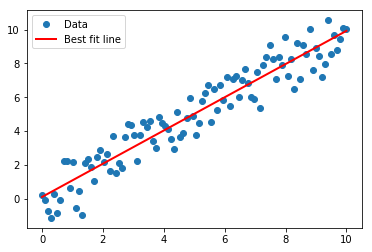

In [6]:
best_fit = []
for i in x_vals:
    best_fit.append(slope * i + y_intercept)
    
plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=2)
plt.legend(loc='upper left')
plt.show()